<a href="https://colab.research.google.com/github/Paospina0718/Metodos-multivariados-2024-1/blob/main/Taller_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Taller Final
**Integrantes:**

Paola Andrea Ospina Sánchez. CC. 1007355141

Laura Alejandra Valbuena Gaona. CC. 1000061520

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics.pairwise import euclidean_distances, manhattan_distances
from sklearn.cluster import AgglomerativeClustering
from sklearn.feature_selection import VarianceThreshold
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns

## 1. Describiendo datos

In [7]:
palma = pd.read_excel('/content/drive/MyDrive/Taller2/Taller final/cornell_data.xlsx')
palma.head()

,condition,Al,As,B,Ca,Cd,Cr,Cu,Fe,K,...,Na,Ni,P,Pb,S,Se,Sr,Ti,V,Zn
0,0,7.1740,0.1972,0.0000,1460.022,0.0196,0.2728,3.6244,19.4220,4570.120,...,22.0880,0.3620,486.876,2.5276,540.398,1.3990,1.2860,0.2942,0.2020,7.4176
1,0,8.9680,0.1936,3.4296,3209.120,0.0000,0.2586,2.0806,21.8118,2341.960,...,23.2756,0.4174,409.836,1.6950,488.682,1.4856,2.8508,0.1616,0.2110,4.3166
2,0,12.9236,0.2128,7.9382,4699.600,0.0000,0.2630,1.6322,24.4452,1876.784,...,30.5752,0.4956,359.552,1.1150,452.620,1.5482,4.4280,0.0840,0.2202,4.8040
3,0,8.6328,0.1770,8.0504,2603.820,0.0332,0.2472,3.1922,25.0502,4316.160,...,26.9528,0.4524,597.778,0.5914,719.018,1.3576,1.8880,0.0000,0.1902,10.6922
4,0,13.8582,0.2018,12.0332,4030.680,0.0000,0.2450,1.9318,25.1492,2508.140,...,24.0584,0.4184,419.228,1.4422,562.484,1.4090,4.0664,0.0000,0.2124,6.8318


In [8]:
# PCA estandarizados
# Separar la variable objetivo
X = palma.iloc[:, 1:]

# Estandarizar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar PCA
pca = PCA()
palma_pca = pca.fit_transform(X_scaled)

# Obtener los componentes principales y la varianza explicada
components = pca.components_
explained_variance = pca.explained_variance_ratio_

# Resumen del PCA
print("Componentes principales:")
print(components)
print("\nVarianza explicada:")
print(explained_variance)


Componentes principales:
[[-1.72093176e-01 -3.62107744e-01 -2.35622499e-01 -1.17272004e-01
   6.01969489e-02 -3.46784725e-01  8.51785481e-02 -1.42373111e-01
   3.59274455e-02 -7.27290517e-02 -1.23001884e-01 -3.48601489e-01
  -1.94115181e-01 -2.61562369e-01  6.93915836e-02 -2.71569856e-02
  -8.98482167e-02 -3.63778717e-01 -1.15012869e-01 -2.71487747e-01
  -3.68269685e-01  2.71593006e-02]
 [-1.25299179e-01  3.95384893e-02 -6.55003490e-02 -2.84270788e-01
   2.62813382e-01  5.44626011e-02  3.27876093e-01 -6.37498046e-03
   3.80315911e-01  2.48785835e-01 -1.26101744e-01  9.76887039e-02
   1.35427778e-01  4.94358711e-02  3.75895514e-01  9.85164128e-02
   3.12872178e-01  4.71379343e-02 -2.82141297e-01  1.09424392e-01
   2.70622717e-02  3.49096891e-01]
 [-4.25014923e-01  8.09368965e-02  1.09549618e-02 -2.62336880e-01
   1.12899981e-01  5.17248319e-02  5.27137945e-04 -3.34236658e-01
  -3.60162897e-02  2.36280341e-01  4.50787634e-01  8.98431854e-02
  -3.32113892e-01  3.06897227e-01 -8.05857352e-

Analisis componentes principales

In [9]:
# Obtener las contribuciones de cada variable al PCA
contribuciones = pd.DataFrame(components.T * np.sqrt(pca.explained_variance_))

# Mostrar las contribuciones
print("Contribuciones de variables al PCA:")
print(contribuciones)


Contribuciones de variables al PCA:
          0         1         2         3         4         5         6   \
0  -0.458454 -0.310574 -0.642305  0.177724  0.096443 -0.354502  0.240744   
1  -0.964650  0.098003  0.122316 -0.116483  0.049311  0.064957 -0.106862   
2  -0.627695 -0.162353  0.016556 -0.492726 -0.244543 -0.193642 -0.218523   
3  -0.312411 -0.704611 -0.396457 -0.320076 -0.140303 -0.006665  0.120224   
4   0.160364  0.651425  0.170620 -0.126335 -0.214393  0.332300  0.326715   
5  -0.923830  0.134994  0.078169  0.122330 -0.006044  0.213469 -0.144033   
6   0.226914  0.812694  0.000797 -0.067129  0.082995 -0.137251  0.164272   
7  -0.379280 -0.015801 -0.505116  0.502983 -0.250192  0.260334 -0.113202   
8   0.095710  0.942675 -0.054430  0.012734  0.031900  0.116122  0.003693   
9  -0.193749  0.616656  0.357079  0.248926 -0.051277 -0.457403 -0.219567   
10 -0.327675 -0.312564  0.681254  0.056881  0.008465 -0.207707  0.377415   
11 -0.928669  0.242137  0.135776 -0.050268  0.010061

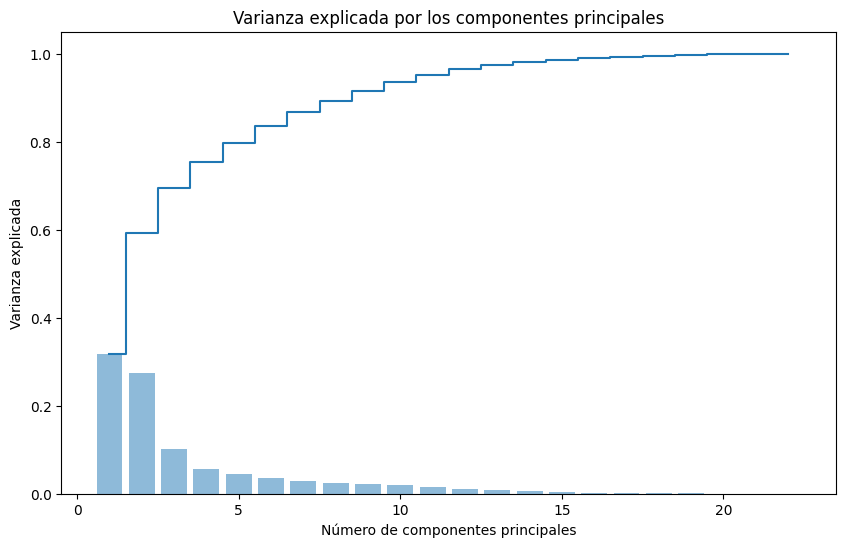

In [10]:
# Gráfico de la varianza explicada
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.5, align='center')
plt.step(range(1, len(explained_variance) + 1), np.cumsum(explained_variance), where='mid')
plt.title('Varianza explicada por los componentes principales')
plt.xlabel('Número de componentes principales')
plt.ylabel('Varianza explicada')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

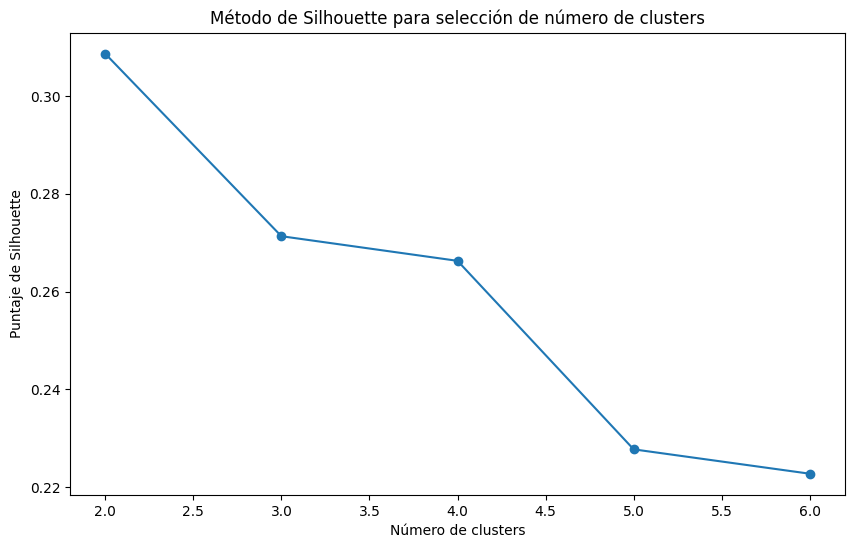

In [11]:
# Aplicar K-means y determinar el número óptimo de clusters usando Silhouette
range_n_clusters = [2, 3, 4, 5, 6]
silhouette_scores = []

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels = kmeans.fit_predict(X_scaled)
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Gráfico de Silhouette para determinar el número óptimo de clusters
plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, silhouette_scores, marker='o')
plt.xlabel('Número de clusters')
plt.ylabel('Puntaje de Silhouette')
plt.title('Método de Silhouette para selección de número de clusters')
plt.show()

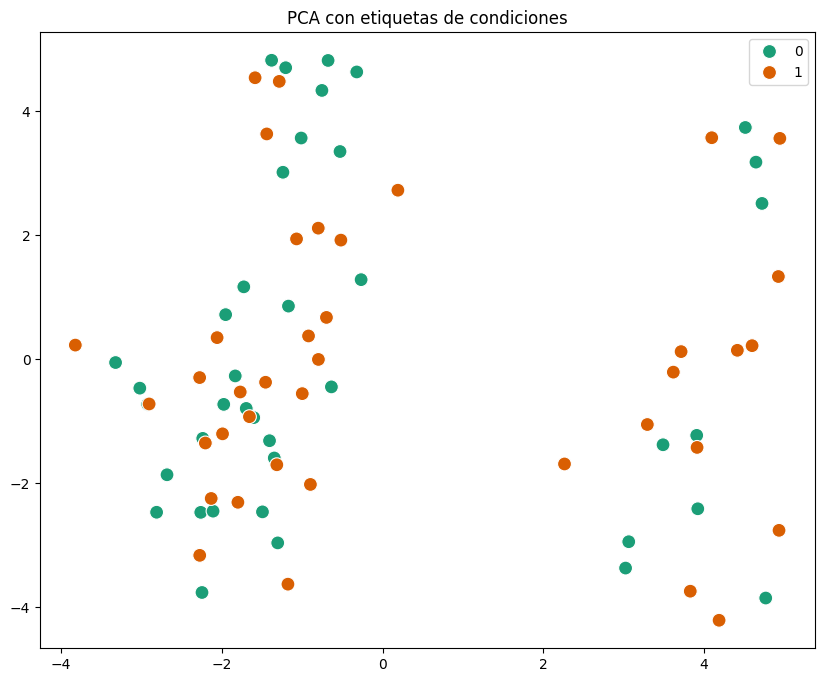

In [15]:
# Visualización de los resultados de PCA con etiquetas de condiciones
plt.figure(figsize=(10, 8))
sns.scatterplot(x=palma_pca[:, 0], y=palma_pca[:, 1], hue=palma['condition'], palette='Dark2', s=100)
plt.title('PCA con etiquetas de condiciones')
plt.legend(loc='best')
plt.show()


In [16]:
# Calcular la matriz de correlación
correlation_matrix = palma.corr()

# Encontrar variables con alta correlación
high_corr_vars = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.6:
            colname = correlation_matrix.columns[i]
            high_corr_vars.add(colname)

print("Variables con alta correlación:")
print(high_corr_vars)


Variables con alta correlación:
{'K ', 'Ti', 'Cr', 'S ', 'P ', 'Zn', 'Se', 'Sr', 'Mo', 'V ', 'Ni'}


In [18]:
# Convertir la variable objetivo a tipo categórico si es necesario
palma['condition'] = palma['condition'].astype('category')

# Entrenar un árbol de decisión
X_tree = palma.drop(columns=['condition'])
y_tree = palma['condition']

# Inicializar y entrenar el modelo de árbol de decisión
tree_model = DecisionTreeClassifier(random_state=0)
tree_model.fit(X_tree, y_tree)

# Obtener la importancia de las variables
importances = tree_model.feature_importances_
features = X_tree.columns

# Mostrar la importancia de las variables
feature_importances = pd.DataFrame({'feature': features, 'importance': importances})
print("Importancia de las variables:")
print(feature_importances)


Importancia de las variables:
   feature  importance
0       Al    0.000000
1       As    0.000000
2       B     0.145487
3       Ca    0.000000
4       Cd    0.000000
5       Cr    0.000000
6       Cu    0.000000
7       Fe    0.000000
8       K     0.000000
9       Mg    0.000000
10      Mn    0.000000
11      Mo    0.177778
12      Na    0.000000
13      Ni    0.156288
14      P     0.000000
15      Pb    0.076923
16      S     0.059172
17      Se    0.120809
18      Sr    0.139119
19      Ti    0.079553
20      V     0.044872
21      Zn    0.000000


Analisis con las variables de importancia (B, Mo, Ni, Pb, S, Se, Sr, Ti, V)

In [19]:
palma2 = pd.read_excel('/content/drive/MyDrive/Taller2/Taller final/Cornell_act.xlsx')
palma2.head()

,condition,B,Mo,Ni,Pb,S,Se,Sr,Ti,V
0,0,0.0000,0.2960,0.3620,2.5276,540.398,1.3990,1.2860,0.2942,0.2020
1,0,3.4296,0.2830,0.4174,1.6950,488.682,1.4856,2.8508,0.1616,0.2110
2,0,7.9382,0.3182,0.4956,1.1150,452.620,1.5482,4.4280,0.0840,0.2202
3,0,8.0504,0.3124,0.4524,0.5914,719.018,1.3576,1.8880,0.0000,0.1902
4,0,12.0332,0.3168,0.4184,1.4422,562.484,1.4090,4.0664,0.0000,0.2124


In [29]:
# PCA estandarizados
# Separar la variable objetivo
X2 = palma2.iloc[:, 1:]

# Estandarizar los datos
scaler2 = StandardScaler()
X_scaled2 = scaler2.fit_transform(X)

# Aplicar PCA
pca2 = PCA()
palma2_pca = pca2.fit_transform(X_scaled2)

# Obtener los componentes principales y la varianza explicada
components2 = pca2.components_
explained_variance2 = pca2.explained_variance_ratio_

# Resumen del PCA
print("Componentes principales:")
print(components2)
print("\nVarianza explicada:")
print(explained_variance2)


Componentes principales:
[[-1.72093176e-01 -3.62107744e-01 -2.35622499e-01 -1.17272004e-01
   6.01969489e-02 -3.46784725e-01  8.51785481e-02 -1.42373111e-01
   3.59274455e-02 -7.27290517e-02 -1.23001884e-01 -3.48601489e-01
  -1.94115181e-01 -2.61562369e-01  6.93915836e-02 -2.71569856e-02
  -8.98482167e-02 -3.63778717e-01 -1.15012869e-01 -2.71487747e-01
  -3.68269685e-01  2.71593006e-02]
 [-1.25299179e-01  3.95384893e-02 -6.55003490e-02 -2.84270788e-01
   2.62813382e-01  5.44626011e-02  3.27876093e-01 -6.37498046e-03
   3.80315911e-01  2.48785835e-01 -1.26101744e-01  9.76887039e-02
   1.35427778e-01  4.94358711e-02  3.75895514e-01  9.85164128e-02
   3.12872178e-01  4.71379343e-02 -2.82141297e-01  1.09424392e-01
   2.70622717e-02  3.49096891e-01]
 [-4.25014923e-01  8.09368965e-02  1.09549618e-02 -2.62336880e-01
   1.12899981e-01  5.17248319e-02  5.27137945e-04 -3.34236658e-01
  -3.60162897e-02  2.36280341e-01  4.50787634e-01  8.98431854e-02
  -3.32113892e-01  3.06897227e-01 -8.05857352e-

In [36]:
# Obtener las contribuciones de cada variable al PCA
contribuciones2 = pd.DataFrame(components2.T * np.sqrt(pca2.explained_variance_))

# Mostrar las contribuciones
print("Contribuciones de variables al PCA:")
print(contribuciones2)


Contribuciones de variables al PCA:
          0         1         2         3         4         5         6   \
0  -0.458454 -0.310574 -0.642305  0.177724  0.096443 -0.354502  0.240744   
1  -0.964650  0.098003  0.122316 -0.116483  0.049311  0.064957 -0.106862   
2  -0.627695 -0.162353  0.016556 -0.492726 -0.244543 -0.193642 -0.218523   
3  -0.312411 -0.704611 -0.396457 -0.320076 -0.140303 -0.006665  0.120224   
4   0.160364  0.651425  0.170620 -0.126335 -0.214393  0.332300  0.326715   
5  -0.923830  0.134994  0.078169  0.122330 -0.006044  0.213469 -0.144033   
6   0.226914  0.812694  0.000797 -0.067129  0.082995 -0.137251  0.164272   
7  -0.379280 -0.015801 -0.505116  0.502983 -0.250192  0.260334 -0.113202   
8   0.095710  0.942675 -0.054430  0.012734  0.031900  0.116122  0.003693   
9  -0.193749  0.616656  0.357079  0.248926 -0.051277 -0.457403 -0.219567   
10 -0.327675 -0.312564  0.681254  0.056881  0.008465 -0.207707  0.377415   
11 -0.928669  0.242137  0.135776 -0.050268  0.010061

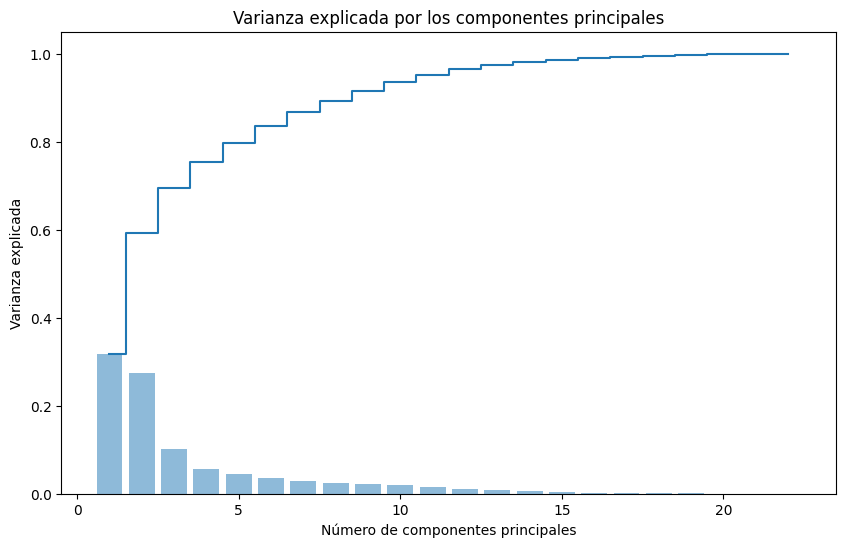

In [37]:
# Gráfico de la varianza explicada
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance2) + 1), explained_variance2, alpha=0.5, align='center')
plt.step(range(1, len(explained_variance2) + 1), np.cumsum(explained_variance2), where='mid')
plt.title('Varianza explicada por los componentes principales')
plt.xlabel('Número de componentes principales')
plt.ylabel('Varianza explicada')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


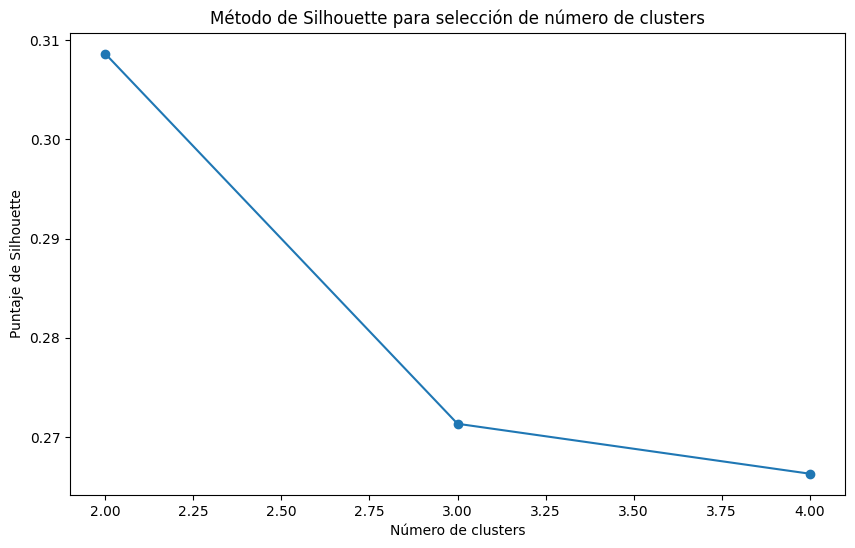

In [39]:
# Aplicar K-means y determinar el número óptimo de clusters usando Silhouette
range_n_clusters = [2, 3, 4]
silhouette_scores = []

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels = kmeans.fit_predict(X_scaled)
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Gráfico de Silhouette para determinar el número óptimo de clusters
plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, silhouette_scores, marker='o')
plt.xlabel('Número de clusters')
plt.ylabel('Puntaje de Silhouette')
plt.title('Método de Silhouette para selección de número de clusters')
plt.show()

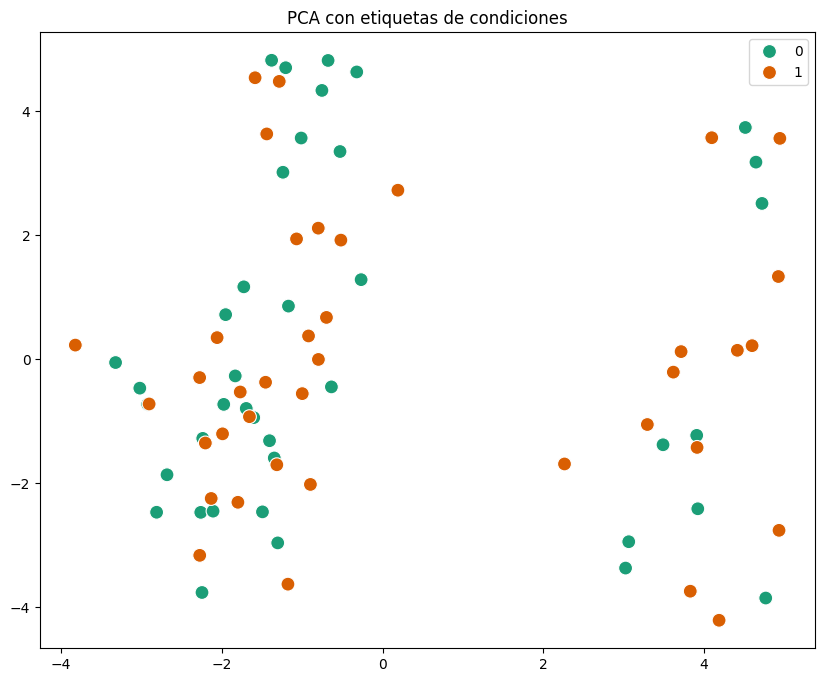

In [40]:
# Visualización de los resultados de PCA con etiquetas de condiciones
plt.figure(figsize=(10, 8))
sns.scatterplot(x=palma2_pca[:, 0], y=palma2_pca[:, 1], hue=palma['condition'], palette='Dark2', s=100)
plt.title('PCA con etiquetas de condiciones')
plt.legend(loc='best')
plt.show()